In [4]:
import numpy as  np
import matplotlib.pyplot as plt
import itertools

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams.update({'font.size': 12})

import warnings; warnings.simplefilter('ignore')

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix 

import mne
from mne.preprocessing import Xdawn
from mne.decoding import Vectorizer
from mne.viz import tight_layout

In [5]:
filename="/Volumes/flashDrive/data/Ex10_Suj1_Run1-epo.fif"
epoch1 = mne.read_epochs(filename)

Reading /Volumes/flashDrive/data/Ex10_Suj1_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [69]:
#epoch1.plot(n_channels=10,n_epochs=5)

In [70]:
#epoch1.proj

In [6]:
epoch1.event_id

{u'after': 20, u'before': 10, u'new': 4, u'scramble': 5}

In [7]:
epoch1.event_id

{u'after': 20, u'before': 10, u'new': 4, u'scramble': 5}

In [8]:
len(epoch1.events[:, -1])

280

In [9]:
# Get the labels
labels = epoch1.events[:, -1]

In [10]:
# the 61st channel produces an error when computin eigenvalues with cross-validation.
# will use channels 0-60 instead.

epoch1 = epoch1.pick_channels(epoch1.ch_names[0:60])

             precision    recall  f1-score   support

     before       0.59      0.58      0.58        69
      after       0.59      0.60      0.60        70

avg / total       0.59      0.59      0.59       139

0.5899280575539568


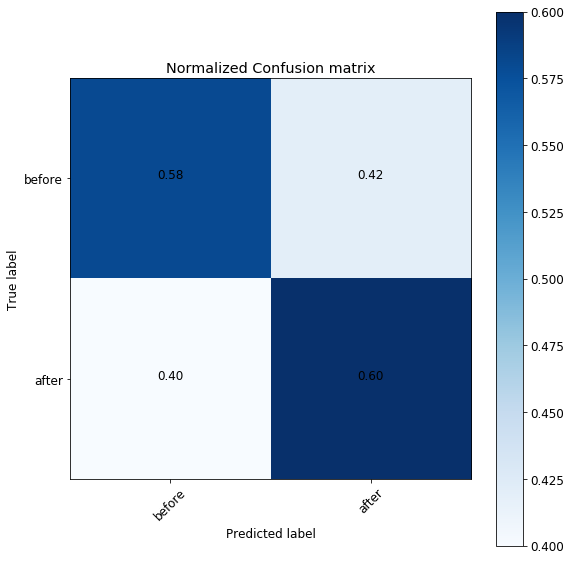

In [11]:
#extract only events with id 10 or 20 (before or after)
epochs_binary = epoch1[(epoch1.events[:,-1] == 10) | (epoch1.events[:,-1] == 20)]

clf = make_pipeline(Xdawn(n_components = 3),
                    Vectorizer(),
                    MinMaxScaler(),
                    LDA())
#cross validator
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)


#Do cross-validation
labels_binary = epochs_binary.events[:,-1]
preds_binary = np.empty(len(labels_binary))
for train, test in cv.split(epochs_binary, labels_binary):
    clf.fit(epochs_binary[train], labels_binary[train])
    preds_binary[test] = clf.predict(epochs_binary[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary, preds_binary, target_names=target_names)
print(report)

hold = []
score = accuracy_score(labels_binary, preds_binary)  
print(score)
hold.append(score)

# Normalized confusion matrix
cm = confusion_matrix(labels_binary, preds_binary)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
fmt = '.2f'
for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
        plt.text(j, i, format(cm_normalized[i, j],fmt),
                 horizontalalignment="center",
                 color="black")
tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
#print hold
#calcualting average classification score for 4 subjects
filename2="/Volumes/flashDrive/data/Ex10_Suj2_Run1-epo.fif"
epoch2 = mne.read_epochs(filename2)

# the 61st channel produces an error when computin eigenvalues with cross-validation.
# will use channels 0-60 instead.

epoch2 = epoch2.pick_channels(epoch2.ch_names[0:60])

#extract only events with id 10 or 20 (before or after)
epochs_binary2 = epoch2[(epoch2.events[:,-1] == 10) | (epoch2.events[:,-1] == 20)]

#Do cross-validation
labels_binary2 = epochs_binary2.events[:,-1]
preds_binary2 = np.empty(len(labels_binary2))
for train, test in cv.split(epochs_binary2, labels_binary2):
    clf.fit(epochs_binary2[train], labels_binary2[train])
    preds_binary2[test] = clf.predict(epochs_binary2[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary2, preds_binary2, target_names=target_names)
print(report)

score2 = accuracy_score(labels_binary2, preds_binary2)  
print(score2)
hold.append(score2)

Reading /Volumes/flashDrive/data/Ex10_Suj2_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
185 matching events found
Created an SSP operator (subspace dimension = 1)
185 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
             precision    recall  f1-score   support

     before       0.56      0.58      0.57        53
      after       0.48      0.45      0.47        44

avg / total       0.52      0.53      0.52        97

0.5257731958762887


In [13]:
filename3="/Volumes/flashDrive/data/Ex10_Suj3_Run1-epo.fif"
epoch3 = mne.read_epochs(filename3)

epoch3 = epoch3.pick_channels(epoch3.ch_names[0:60])

#extract only events with id 10 or 20 (before or after)
epochs_binary3 = epoch3[(epoch3.events[:,-1] == 10) | (epoch3.events[:,-1] == 20)]

#Do cross-validation
labels_binary3 = epochs_binary3.events[:,-1]
preds_binary3 = np.empty(len(labels_binary3))
for train, test in cv.split(epochs_binary3, labels_binary3):
    clf.fit(epochs_binary3[train], labels_binary3[train])
    preds_binary3[test] = clf.predict(epochs_binary3[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary3, preds_binary3, target_names=target_names)
print(report)

score3 = accuracy_score(labels_binary3, preds_binary3)  
print(score3)
hold.append(score3)
#print hold

Reading /Volumes/flashDrive/data/Ex10_Suj3_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
             precision    recall  f1-score   support

     before       0.48      0.42      0.45        73
      after       0.49      0.55      0.52        74

avg / total       0.49      0.49      0.49       147

0.4897959183673469


In [14]:
filename4="/Volumes/flashDrive/data/Ex10_Suj4_Run1-epo.fif"
epoch4 = mne.read_epochs(filename4)

epoch4 = epoch4.pick_channels(epoch4.ch_names[0:60])

#extract only events with id 10 or 20 (before or after)
epochs_binary4 = epoch4[(epoch4.events[:,-1] == 10) | (epoch4.events[:,-1] == 20)]

#Do cross-validation
labels_binary4 = epochs_binary4.events[:,-1]
preds_binary4 = np.empty(len(labels_binary4))
for train, test in cv.split(epochs_binary4, labels_binary4):
    clf.fit(epochs_binary4[train], labels_binary4[train])
    preds_binary4[test] = clf.predict(epochs_binary4[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary4, preds_binary4, target_names=target_names)
print(report)

score4 = accuracy_score(labels_binary4, preds_binary4)  
print(score4)
hold.append(score4)

Reading /Volumes/flashDrive/data/Ex10_Suj4_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
             precision    recall  f1-score   support

     before       0.51      0.51      0.51        73
      after       0.51      0.51      0.51        72

avg / total       0.51      0.51      0.51       145

0.5103448275862069


In [15]:
print hold

[0.5899280575539568, 0.5257731958762887, 0.4897959183673469, 0.5103448275862069]


In [16]:
#run 2
filename1="/Volumes/flashDrive/data/Ex10_Suj1_Run2-epo.fif"
epoch1 = mne.read_epochs(filename1)

epoch1 = epoch1.pick_channels(epoch1.ch_names[0:60])

#extract only events with id 10 or 20 (before or after)
epochs_binary1 = epoch1[(epoch1.events[:,-1] == 10) | (epoch1.events[:,-1] == 20)]

#Do cross-validation
labels_binary1 = epochs_binary1.events[:,-1]
preds_binary1 = np.empty(len(labels_binary1))
for train, test in cv.split(epochs_binary1, labels_binary1):
    clf.fit(epochs_binary1[train], labels_binary1[train])
    preds_binary1[test] = clf.predict(epochs_binary1[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary1, preds_binary1, target_names=target_names)
print(report)

score1 = accuracy_score(labels_binary1, preds_binary1)  
print(score1)
hold.append(score1)

Reading /Volumes/flashDrive/data/Ex10_Suj1_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
             precision    recall  f1-score   support

     before       0.53      0.51      0.52        70
      after       0.53      0.55      0.54        71

avg / total       0.53      0.53      0.53       141

0.5319148936170213


In [17]:
filename2="/Volumes/flashDrive/data/Ex10_Suj2_Run2-epo.fif"
epoch2 = mne.read_epochs(filename2)

# the 61st channel produces an error when computin eigenvalues with cross-validation.
# will use channels 0-60 instead.

epoch2 = epoch2.pick_channels(epoch2.ch_names[0:60])

#extract only events with id 10 or 20 (before or after)
epochs_binary2 = epoch2[(epoch2.events[:,-1] == 10) | (epoch2.events[:,-1] == 20)]

#Do cross-validation
labels_binary2 = epochs_binary2.events[:,-1]
preds_binary2 = np.empty(len(labels_binary2))
for train, test in cv.split(epochs_binary2, labels_binary2):
    clf.fit(epochs_binary2[train], labels_binary2[train])
    preds_binary2[test] = clf.predict(epochs_binary2[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary2, preds_binary2, target_names=target_names)
print(report)

score2 = accuracy_score(labels_binary2, preds_binary2)  
print(score2)
hold.append(score2)

Reading /Volumes/flashDrive/data/Ex10_Suj2_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
85 matching events found
Created an SSP operator (subspace dimension = 1)
85 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
             precision    recall  f1-score   support

     before       0.42      0.31      0.36        16
      after       0.67      0.76      0.71        29

avg / total       0.58      0.60      0.58        45

0.6


In [18]:
filename3="/Volumes/flashDrive/data/Ex10_Suj3_Run2-epo.fif"
epoch3 = mne.read_epochs(filename3)

epoch3 = epoch3.pick_channels(epoch3.ch_names[0:60])

#extract only events with id 10 or 20 (before or after)
epochs_binary3 = epoch3[(epoch3.events[:,-1] == 10) | (epoch3.events[:,-1] == 20)]

#Do cross-validation
labels_binary3 = epochs_binary3.events[:,-1]
preds_binary3 = np.empty(len(labels_binary3))
for train, test in cv.split(epochs_binary3, labels_binary3):
    clf.fit(epochs_binary3[train], labels_binary3[train])
    preds_binary3[test] = clf.predict(epochs_binary3[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary3, preds_binary3, target_names=target_names)
print(report)

score3 = accuracy_score(labels_binary3, preds_binary3)  
print(score3)
hold.append(score3)

Reading /Volumes/flashDrive/data/Ex10_Suj3_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
94 matching events found
Created an SSP operator (subspace dimension = 1)
94 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
             precision    recall  f1-score   support

     before       0.37      0.29      0.33        24
      after       0.48      0.57      0.52        28

avg / total       0.43      0.44      0.43        52

0.4423076923076923


In [19]:
filename4="/Volumes/flashDrive/data/Ex10_Suj4_Run2-epo.fif"
epoch4 = mne.read_epochs(filename4)

epoch4 = epoch4.pick_channels(epoch4.ch_names[0:60])

#extract only events with id 10 or 20 (before or after)
epochs_binary4 = epoch4[(epoch4.events[:,-1] == 10) | (epoch4.events[:,-1] == 20)]

#Do cross-validation
labels_binary4 = epochs_binary4.events[:,-1]
preds_binary4 = np.empty(len(labels_binary4))
for train, test in cv.split(epochs_binary4, labels_binary4):
    clf.fit(epochs_binary4[train], labels_binary4[train])
    preds_binary4[test] = clf.predict(epochs_binary4[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary4, preds_binary4, target_names=target_names)
print(report)

score4 = accuracy_score(labels_binary4, preds_binary4)  
print(score4)
hold.append(score4)

Reading /Volumes/flashDrive/data/Ex10_Suj4_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
275 matching events found
Created an SSP operator (subspace dimension = 1)
275 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
             precision    recall  f1-score   support

     before       0.53      0.51      0.52        70
      after       0.53      0.54      0.54        70

avg / total       0.53      0.53      0.53       140

0.5285714285714286


In [20]:
#run 3
filename1="/Volumes/flashDrive/data/Ex10_Suj1_Run3-epo.fif"
epoch1 = mne.read_epochs(filename1)

epoch1 = epoch1.pick_channels(epoch1.ch_names[0:60])

#extract only events with id 10 or 20 (before or after)
epochs_binary1 = epoch1[(epoch1.events[:,-1] == 10) | (epoch1.events[:,-1] == 20)]

#Do cross-validation
labels_binary1 = epochs_binary1.events[:,-1]
preds_binary1 = np.empty(len(labels_binary1))
for train, test in cv.split(epochs_binary1, labels_binary1):
    clf.fit(epochs_binary1[train], labels_binary1[train])
    preds_binary1[test] = clf.predict(epochs_binary1[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary1, preds_binary1, target_names=target_names)
print(report)

score1 = accuracy_score(labels_binary1, preds_binary1)  
print(score1)
hold.append(score1)

Reading /Volumes/flashDrive/data/Ex10_Suj1_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
287 matching events found
Created an SSP operator (subspace dimension = 1)
287 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
             precision    recall  f1-score   support

     before       0.52      0.54      0.53        71
      after       0.53      0.51      0.52        72

avg / total       0.52      0.52      0.52       143

0.5244755244755245


In [21]:
filename2="/Volumes/flashDrive/data/Ex10_Suj2_Run3-epo.fif"
epoch2 = mne.read_epochs(filename2)

# the 61st channel produces an error when computin eigenvalues with cross-validation.
# will use channels 0-60 instead.

epoch2 = epoch2.pick_channels(epoch2.ch_names[0:60])

#extract only events with id 10 or 20 (before or after)
epochs_binary2 = epoch2[(epoch2.events[:,-1] == 10) | (epoch2.events[:,-1] == 20)]

#Do cross-validation
labels_binary2 = epochs_binary2.events[:,-1]
preds_binary2 = np.empty(len(labels_binary2))
for train, test in cv.split(epochs_binary2, labels_binary2):
    clf.fit(epochs_binary2[train], labels_binary2[train])
    preds_binary2[test] = clf.predict(epochs_binary2[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary2, preds_binary2, target_names=target_names)
print(report)

score2 = accuracy_score(labels_binary2, preds_binary2)  
print(score2)
hold.append(score2)

Reading /Volumes/flashDrive/data/Ex10_Suj2_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
238 matching events found
Created an SSP operator (subspace dimension = 1)
238 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
             precision    recall  f1-score   support

     before       0.56      0.57      0.56        60
      after       0.54      0.53      0.53        57

avg / total       0.55      0.55      0.55       117

0.5470085470085471


In [22]:
filename3="/Volumes/flashDrive/data/Ex10_Suj3_Run3-epo.fif"
epoch3 = mne.read_epochs(filename3)

epoch3 = epoch3.pick_channels(epoch3.ch_names[0:60])

#extract only events with id 10 or 20 (before or after)
epochs_binary3 = epoch3[(epoch3.events[:,-1] == 10) | (epoch3.events[:,-1] == 20)]

#Do cross-validation
labels_binary3 = epochs_binary3.events[:,-1]
preds_binary3 = np.empty(len(labels_binary3))
for train, test in cv.split(epochs_binary3, labels_binary3):
    clf.fit(epochs_binary3[train], labels_binary3[train])
    preds_binary3[test] = clf.predict(epochs_binary3[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary3, preds_binary3, target_names=target_names)
print(report)

score3 = accuracy_score(labels_binary3, preds_binary3)  
print(score3)
hold.append(score3)

Reading /Volumes/flashDrive/data/Ex10_Suj3_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
172 matching events found
Created an SSP operator (subspace dimension = 1)
172 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
             precision    recall  f1-score   support

     before       0.52      0.47      0.50        53
      after       0.48      0.53      0.50        49

avg / total       0.50      0.50      0.50       102

0.5


In [23]:
filename4="/Volumes/flashDrive/data/Ex10_Suj4_Run3-epo.fif"
epoch4 = mne.read_epochs(filename4)

epoch4 = epoch4.pick_channels(epoch4.ch_names[0:60])

#extract only events with id 10 or 20 (before or after)
epochs_binary4 = epoch4[(epoch4.events[:,-1] == 10) | (epoch4.events[:,-1] == 20)]

#Do cross-validation
labels_binary4 = epochs_binary4.events[:,-1]
preds_binary4 = np.empty(len(labels_binary4))
for train, test in cv.split(epochs_binary4, labels_binary4):
    clf.fit(epochs_binary4[train], labels_binary4[train])
    preds_binary4[test] = clf.predict(epochs_binary4[test])
    
target_names = ['before', 'after']
report = classification_report(labels_binary4, preds_binary4, target_names=target_names)
print(report)

score4 = accuracy_score(labels_binary4, preds_binary4)  
print(score4)
hold.append(score4)

Reading /Volumes/flashDrive/data/Ex10_Suj4_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
277 matching events found
Created an SSP operator (subspace dimension = 1)
277 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
             precision    recall  f1-score   support

     before       0.57      0.57      0.57        70
      after       0.55      0.55      0.55        67

avg / total       0.56      0.56      0.56       137

0.5620437956204379


In [24]:
print hold

[0.5899280575539568, 0.5257731958762887, 0.4897959183673469, 0.5103448275862069, 0.5319148936170213, 0.6, 0.4423076923076923, 0.5285714285714286, 0.5244755244755245, 0.5470085470085471, 0.5, 0.5620437956204379]


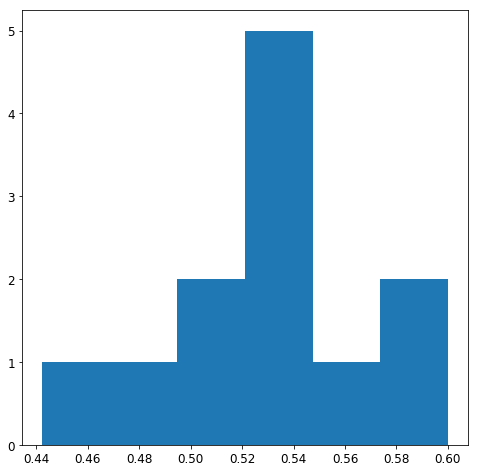

In [55]:
total_score = []
for i in range(1,14):
    for j in range(1,5):
        if i == 4:
            if j==4:
                continue
        elif i == 11:
            if j == 3:
                continue
        elif i == 12:
            if j == 1:
                continue
        elif i == 20:
            if j == 2:
                continue   
                
        file = "/Volumes/flashDrive/data/Ex10_Suj" + str(i)+ "_Run" + str(j) + "-epo.fif"
        epoch = mne.read_epochs(file) 
        epoch = epoch.pick_channels(epoch.ch_names[0:60])
        
        #extract only events with id 4 or 5 (new or scramble)
        epochs_binary = epoch[(epoch.events[:,-1] == 4) | (epoch.events[:,-1] == 5)]
        
        #Do cross-validation
        labels_binary = epochs_binary.events[:,-1]
        preds_binary = np.empty(len(labels_binary))
        for train, test in cv.split(epochs_binary, labels_binary):
            clf.fit(epochs_binary[train], labels_binary[train])
            preds_binary[test] = clf.predict(epochs_binary[test])
        
        target_names = ['new', 'scrambled']
        report = classification_report(labels_binary, preds_binary, target_names=target_names)
        score = accuracy_score(labels_binary, preds_binary)  
        print(score)
        total_score.append(score)
        
       


Reading /Volumes/flashDrive/data/Ex10_Suj1_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.6170212765957447
Reading /Volumes/flashDrive/data/Ex10_Suj1_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.6875
Reading /Volumes/flashDrive/data/Ex10_Suj1_Run3-ep

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
256 matching events found
Created an SSP operator (subspace dimension = 1)
256 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.6129032258064516
Reading /Volumes/flashDrive/data/Ex10_Suj5_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
221 matching events found
Created an SSP operator (subspace dimension = 1)
221 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.49056603773584906
Reading /Volumes/flashDrive/data/Ex10_Suj6_Run1-epo.fif ...
Isotrak not found
    Read a total of

    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
295 matching events found
Created an SSP operator (subspace dimension = 1)
295 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.5405405405405406
Reading /Volumes/flashDrive/data/Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.6241610738255033
Reading /Volumes/flashDrive/data/Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection ite

In [61]:
temp = []
for i in range(14,21):
    for j in range(1,5):
        if i == 14:
            if j == 4:
                continue  
        elif i == 15:
            if j == 3:
                continue 
            if j == 4:
                continue
        elif i == 20:
            if j == 2:
                continue          
                
        file = "/Volumes/flashDrive/data/Ex10_Suj" + str(i)+ "_Run" + str(j) + "-epo.fif"
        epoch = mne.read_epochs(file) 
        epoch = epoch.pick_channels(epoch.ch_names[0:60])
        
        #extract only events with id 4 or 5 (new or scramble)
        epochs_binary = epoch[(epoch.events[:,-1] == 4) | (epoch.events[:,-1] == 5)]
        
        #Do cross-validation
        labels_binary = epochs_binary.events[:,-1]
        preds_binary = np.empty(len(labels_binary))
        for train, test in cv.split(epochs_binary, labels_binary):
            clf.fit(epochs_binary[train], labels_binary[train])
            preds_binary[test] = clf.predict(epochs_binary[test])
        
        target_names = ['new', 'scrambled']
        report = classification_report(labels_binary, preds_binary, target_names=target_names)
        score = accuracy_score(labels_binary, preds_binary)  
        print(score)
        temp.append(score) 

Reading /Volumes/flashDrive/data/Ex10_Suj14_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
281 matching events found
Created an SSP operator (subspace dimension = 1)
281 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.5
Reading /Volumes/flashDrive/data/Ex10_Suj14_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
300 matching events found
Created an SSP operator (subspace dimension = 1)
300 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.5133333333333333
Reading /Volumes/flashDrive/data/Ex10_Suj14_Run3-ep

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
183 matching events found
Created an SSP operator (subspace dimension = 1)
183 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.8985507246376812
Reading /Volumes/flashDrive/data/Ex10_Suj19_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
173 matching events found
Created an SSP operator (subspace dimension = 1)
173 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0.7714285714285715
Reading /Volumes/flashDrive/data/Ex10_Suj19_Run3-epo.fif ...
Isotrak not found
    Read a total o

(array([11., 11., 14., 17.,  9.,  3.,  2.,  1.,  5.]),
 array([0.47297297, 0.52479752, 0.57662208, 0.62844663, 0.68027118,
        0.73209573, 0.78392028, 0.83574484, 0.88756939, 0.93939394]),
 <a list of 9 Patch objects>)

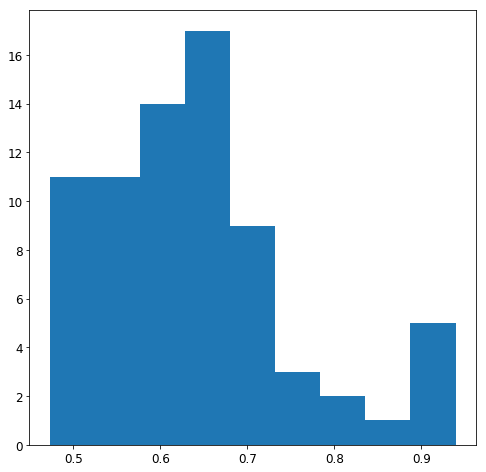

In [80]:
total = total_score + temp
plt.hist(total,bins=9)

In [66]:
np_total = np.array(total)

In [67]:
np.mean(np_total)

0.6396393543021363

In [68]:
np.min(np_total)

0.47297297297297297

In [69]:
np.max(np_total)

0.9393939393939394